In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import metrics

In [2]:
Data = pd.read_csv("telecom_churn.csv")

In [3]:
Data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [5]:
Data.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [6]:
a,b,c=Data["total_day_minutes"],Data["total_eve_minutes"],Data["total_night_minutes"]
print(f"Maximum daily minutes : {max(a+b+c)} \nAverage daily minutes : {round((a+b+c).mean(),2)}")

Maximum daily minutes : 876.9 
Average daily minutes : 581.32


array([[<Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'area_code'}>,
        <Axes: title={'center': 'phone_number'}>,
        <Axes: title={'center': 'international_plan'}>],
       [<Axes: title={'center': 'voice_mail_plan'}>,
        <Axes: title={'center': 'number_vmail_messages'}>,
        <Axes: title={'center': 'total_day_minutes'}>,
        <Axes: title={'center': 'total_day_calls'}>,
        <Axes: title={'center': 'total_day_charge'}>],
       [<Axes: title={'center': 'total_eve_minutes'}>,
        <Axes: title={'center': 'total_eve_calls'}>,
        <Axes: title={'center': 'total_eve_charge'}>,
        <Axes: title={'center': 'total_night_minutes'}>,
        <Axes: title={'center': 'total_night_calls'}>],
       [<Axes: title={'center': 'total_night_charge'}>,
        <Axes: title={'center': 'total_intl_minutes'}>,
        <Axes: title={'center': 'total_intl_calls'}>,
        <Axes: title={'center': 'to

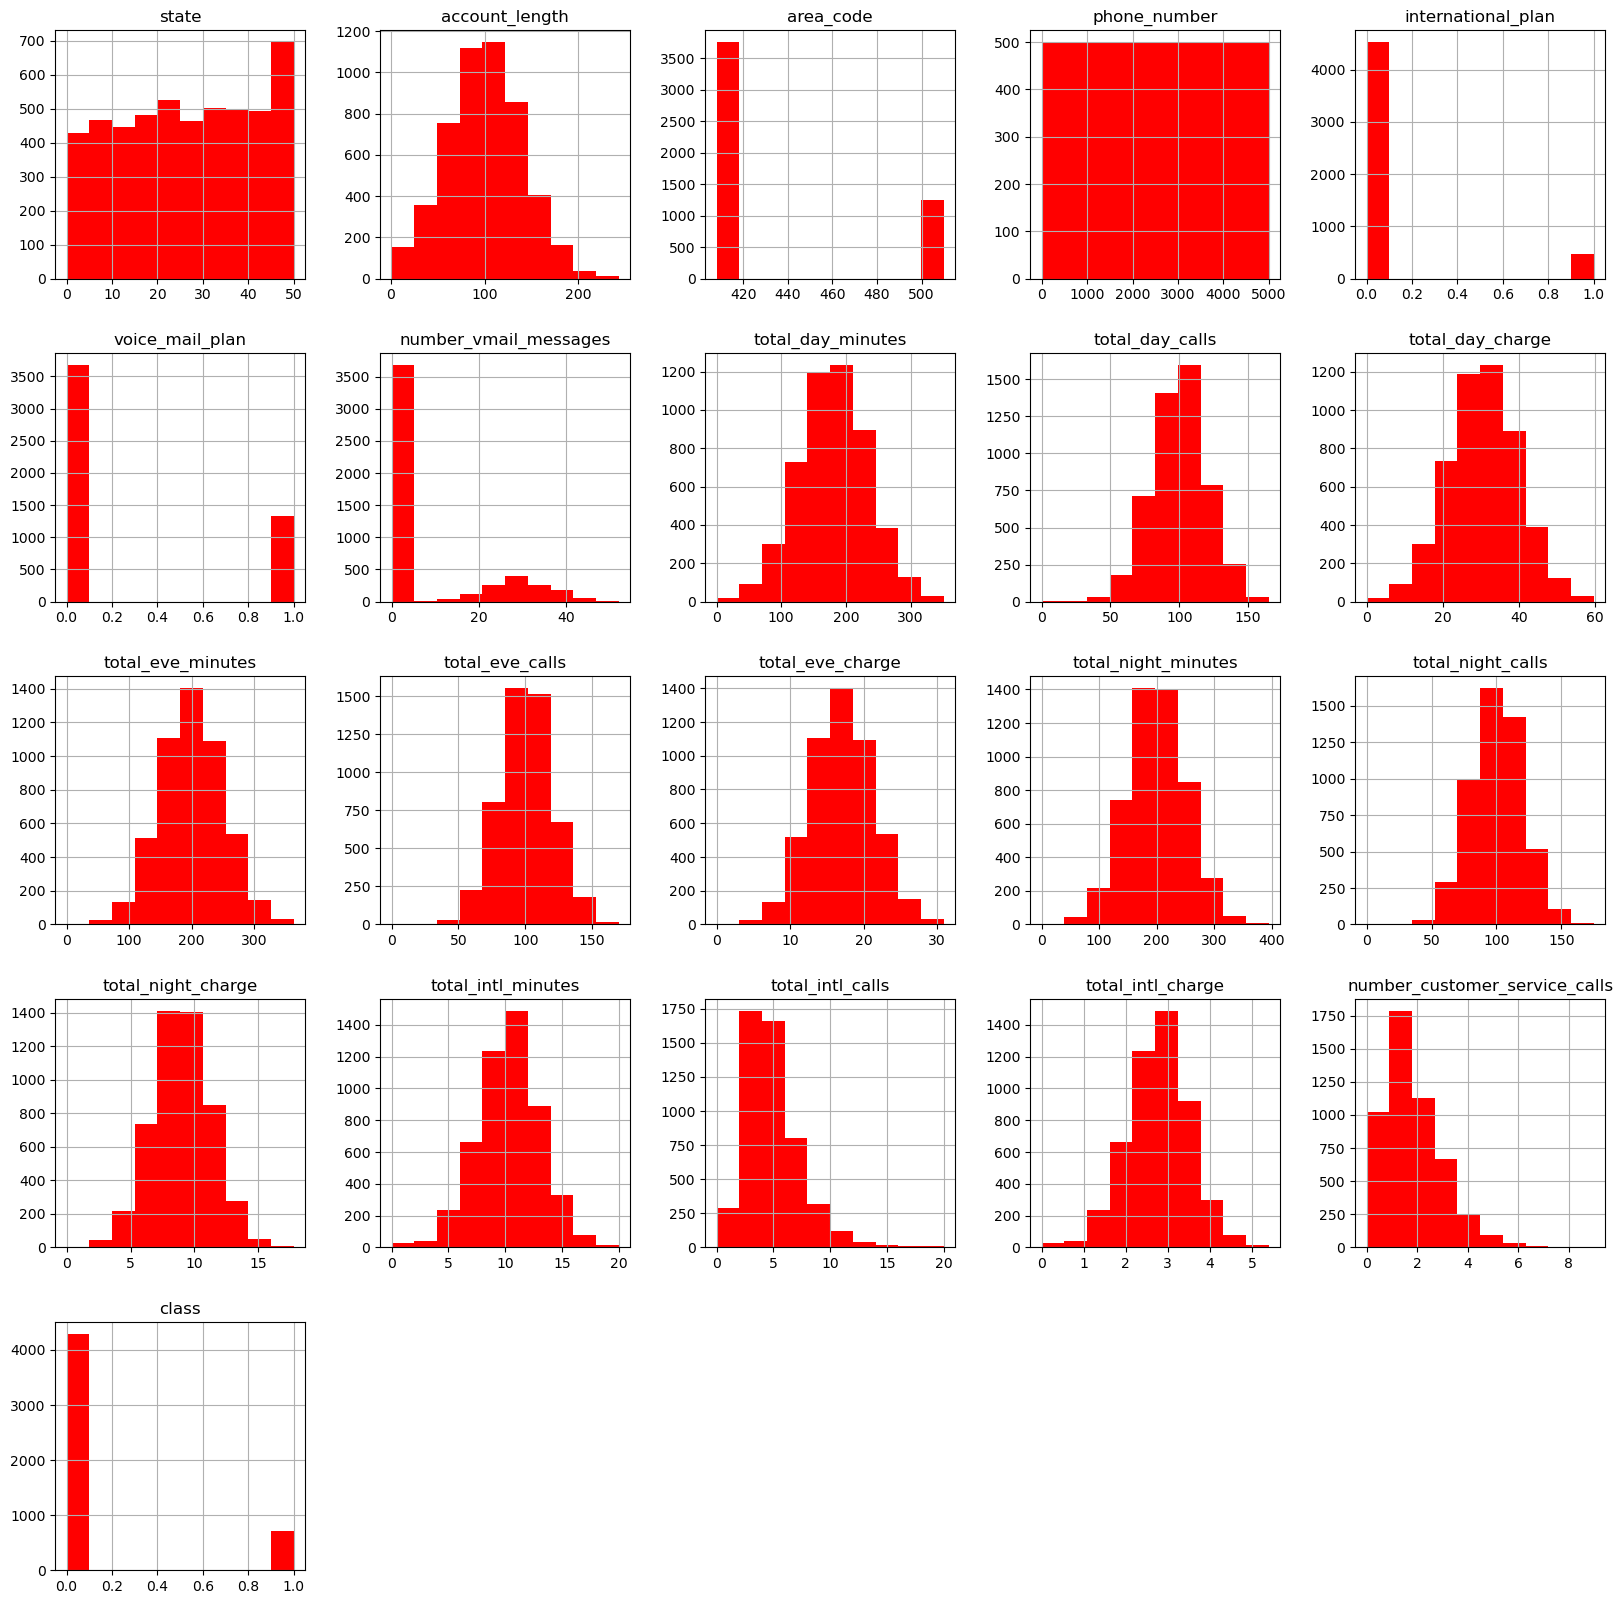

In [7]:
Data.hist(figsize = (20,20),color='red')

In [8]:
Data['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

<Axes: ylabel='class'>

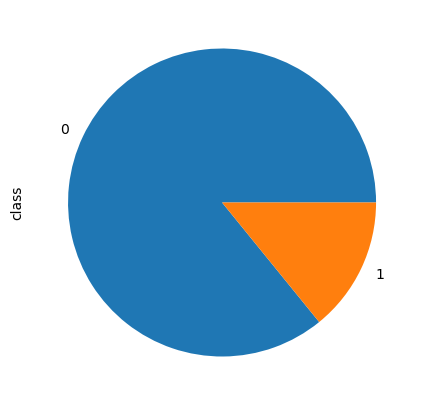

In [9]:
plt.figure(figsize=[5,5])
Data['class'].value_counts().plot(kind = 'pie')

In [10]:
correlation = (Data.corr())['class']
print(correlation)

state                            0.006946
account_length                   0.021203
area_code                        0.010195
phone_number                     0.012371
international_plan               0.259123
voice_mail_plan                 -0.110698
number_vmail_messages           -0.097633
total_day_minutes                0.207705
total_day_calls                  0.016130
total_day_charge                 0.207700
total_eve_minutes                0.089288
total_eve_calls                 -0.006284
total_eve_charge                 0.089282
total_night_minutes              0.045677
total_night_calls               -0.006986
total_night_charge               0.045673
total_intl_minutes               0.063285
total_intl_calls                -0.046893
total_intl_charge                0.063275
number_customer_service_calls    0.212564
class                            1.000000
Name: class, dtype: float64


<Axes: >

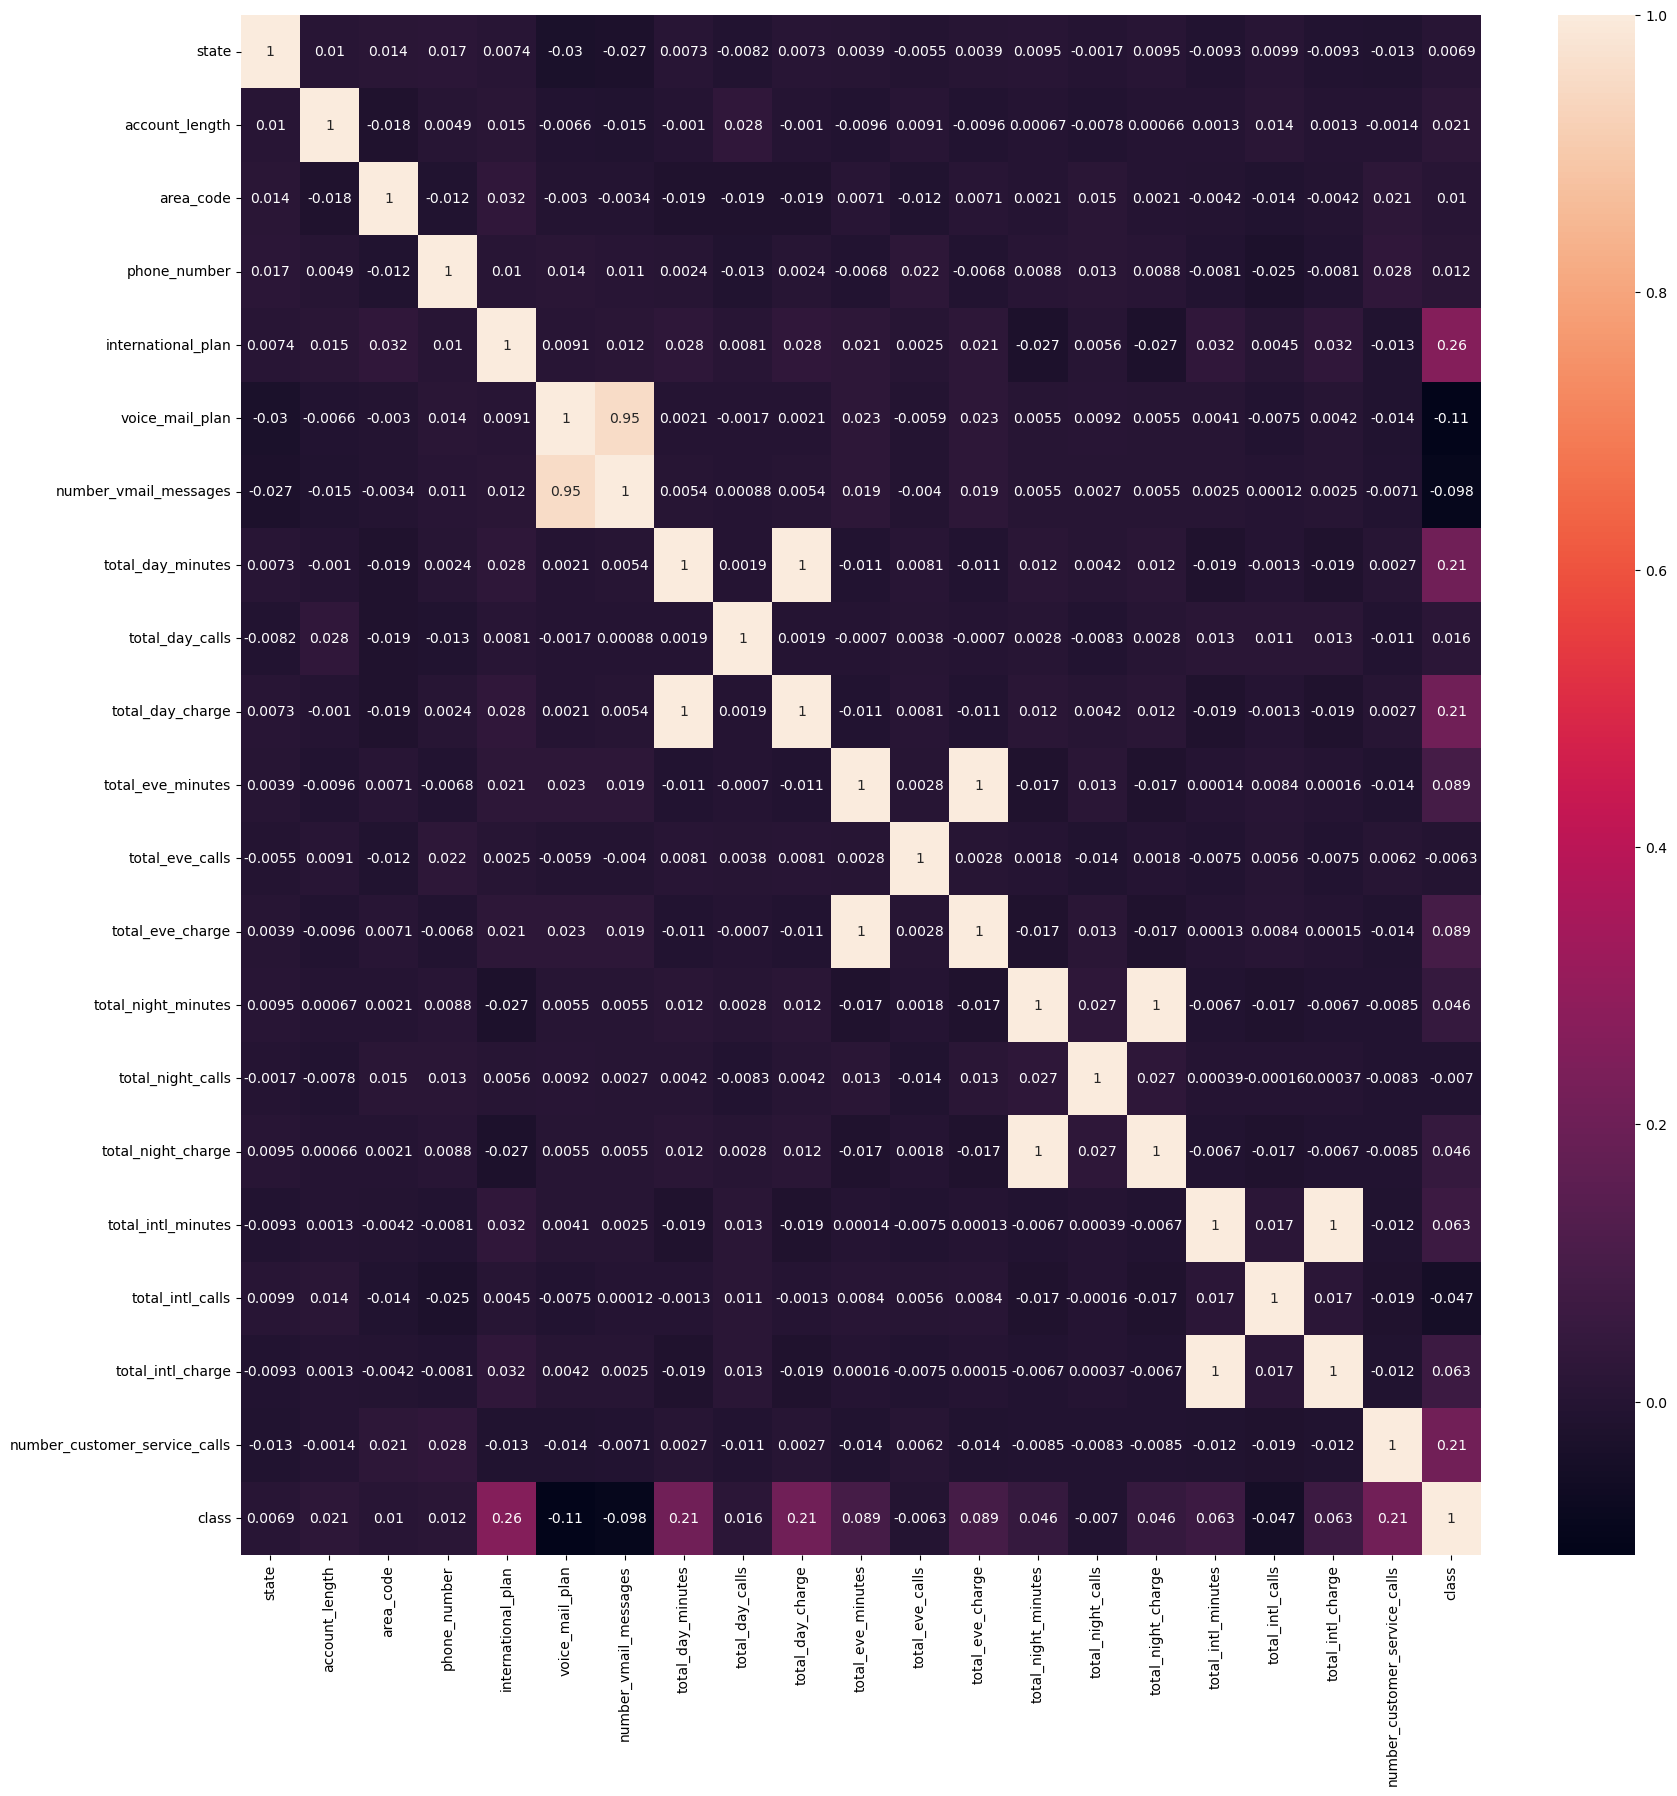

In [11]:
plt.figure(figsize=(20,20))
sb.heatmap(Data.corr(),annot=True)

Text(0.5, 1.0, 'Distribution of day charges by churn')

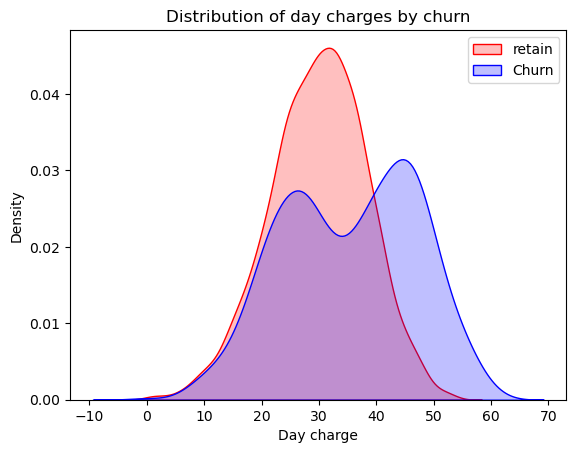

In [12]:
ax = sb.kdeplot(Data.total_day_charge[(Data['class']==0)],fill= True,color='red')
ax = sb.kdeplot(Data.total_day_charge[(Data['class']==1)],fill= True,color="blue")

ax.legend(["retain","Churn"])
ax.set_ylabel("Density")
ax.set_xlabel("Day charge")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

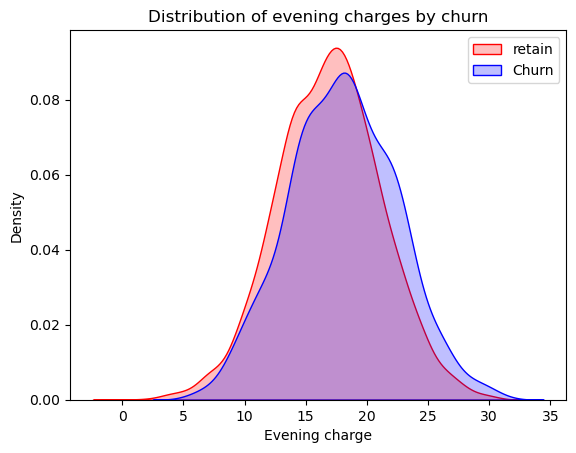

In [13]:
ax = sb.kdeplot(Data.total_eve_charge[(Data['class']==0)],fill= True,color='red')
ax = sb.kdeplot(Data.total_eve_charge[(Data['class']==1)],fill= True,color="blue")

ax.legend(["retain","Churn"])
ax.set_ylabel("Density")
ax.set_xlabel("Evening charge")
ax.set_title("Distribution of evening charges by churn")

In [14]:
X= Data.drop(['class','phone_number','area_code'],axis = 1)
Y= Data['class']
print(X.shape,Y.shape)

(5000, 18) (5000,)


In [15]:
# x=np.array(X)
# y=np.array(Y)
# y=y.reshape(-1,1)
# print(y.shape)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state= 41)

### plotting feature importance : 


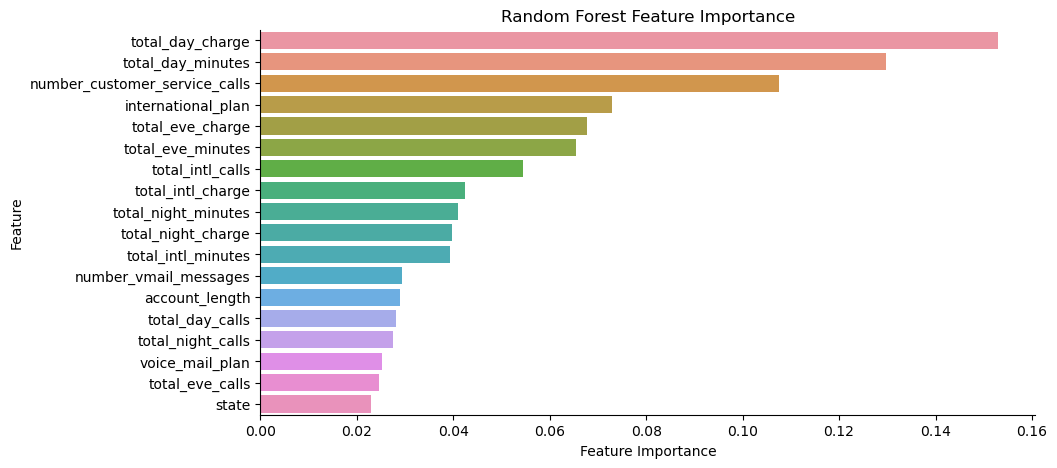

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train.values.ravel())

feat_scores = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feat_scores = feat_scores.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sb.barplot(x="Importance", y="Feature", data=feat_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
sb.despine()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

model_LR = LogisticRegression(max_iter=5000)
model_LR.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [22]:
y_predict = model_LR.predict(x_test)

In [23]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       843
           1       0.62      0.24      0.34       157

    accuracy                           0.86      1000
   macro avg       0.74      0.60      0.63      1000
weighted avg       0.83      0.86      0.83      1000



<pre>Precision is the ratio of TP/(TP+FP)</pre>
<pre>Recall is the ratio of TP/(TP+FN)</pre>
F-beta score can be interpreted as a weighted harmonic mean of the precision and recall. Where an F-beta score reaches its best value at 1 and worst score at 0.

<Axes: >

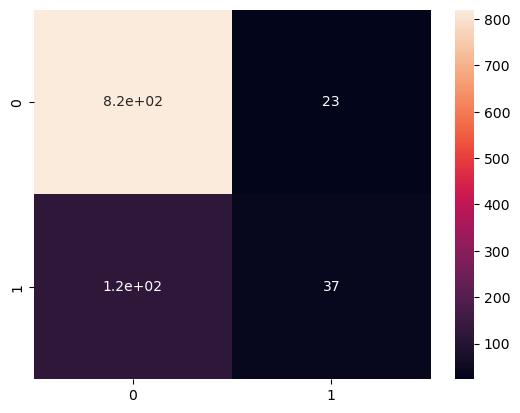

In [25]:
cm=(confusion_matrix(y_test,y_predict))

sb.heatmap(cm,annot=True)

In [27]:
from sklearn.calibration import CalibratedClassifierCV # for probability output score
from sklearn.svm import LinearSVC

model_svc=  LinearSVC(max_iter=50000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(x_train,y_train) 

f:\OneWeekDataScience\OneWeekDSML\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\OneWeekDataScience\OneWeekDSML\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\OneWeekDataScience\OneWeekDSML\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\OneWeekDataScience\OneWeekDSML\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\OneWeekDataScience\OneWeekDSML\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC(max_iter=50000))

In [29]:
y_predict = model_svm.predict(x_test)

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       843
           1       0.66      0.21      0.32       157

    accuracy                           0.86      1000
   macro avg       0.76      0.60      0.62      1000
weighted avg       0.84      0.86      0.83      1000



<Axes: >

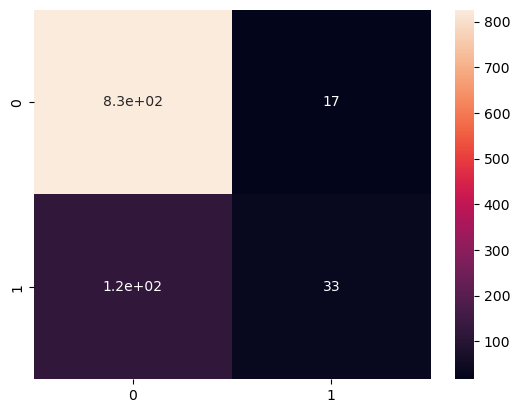

In [31]:
cm= confusion_matrix(y_test,y_predict)
sb.heatmap(cm,annot=True)

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
y_predict = model_rf.predict(x_test)

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       843
           1       0.91      0.81      0.86       157

    accuracy                           0.96      1000
   macro avg       0.94      0.90      0.92      1000
weighted avg       0.96      0.96      0.96      1000



<Axes: >

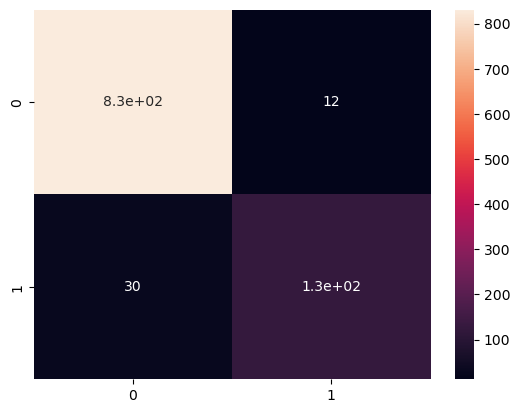

In [35]:
cf = confusion_matrix(y_test,y_predict)
sb.heatmap(cf , annot = True)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
y_predict = model_knn.predict(x_test)

In [38]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       843
           1       0.85      0.30      0.44       157

    accuracy                           0.88      1000
   macro avg       0.87      0.64      0.69      1000
weighted avg       0.88      0.88      0.86      1000



<Axes: >

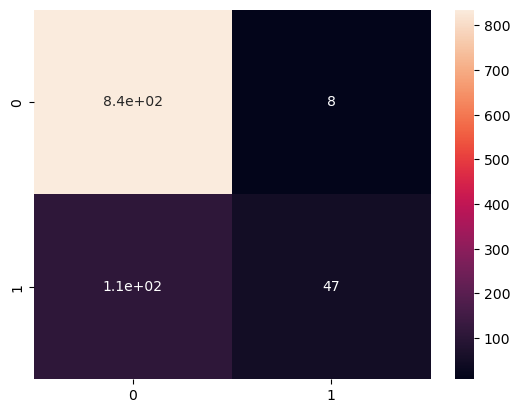

In [40]:
cm = confusion_matrix(y_test,y_predict)
sb.heatmap(cm,annot = True)